<a href="https://colab.research.google.com/github/ToyTeX/NumericalNotebooks/blob/main/HouseholderQR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We implement Householder "orthogonal triangularization", a principal method for [QR factorization](https://en.wikipedia.org/wiki/QR_decomposition) known to be more numerically stable than Gram-Schmidt.  Similar to how [Gram-Schmidt](https://textbooks.math.gatech.edu/ila/orthogonal-sets.html) successively applies triangular matrices $R_k$ by right multiplication to $A$ so that the resulting matrix $\hat{Q}$ has orthonormal columns (i.e. $A = \hat{Q}\hat{R}$ as a reduced QR factorization), Householder makes a matrix $A$ triangular by successive left multiplication of unitary matrices $Q_k$ so that the resulting matrix
$$Q_n . . . Q_2Q_1A = R$$   

is upper triangular.  The product $Q = Q_n^* . . . Q_2^*Q_1^*$ is unitary as well, so we have a full QR factorization of $A$.
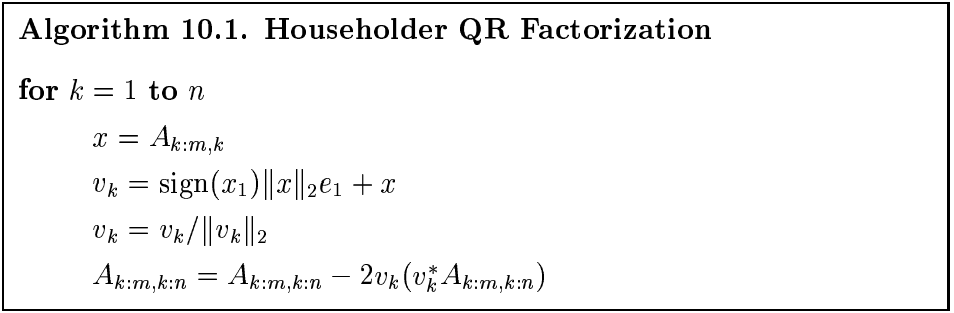
Source: [Numerical Linear Algebra by Trefethen and Bau](https://www.stat.uchicago.edu/~lekheng/courses/309/books/Trefethen-Bau.pdf)

In [5]:
import numpy as np

# Define the matrix A
A = np.array([[1, 1],
              [-1, 0],
              [0, 1]], dtype=float)

print("Original matrix A:")
print(A)
print("\n" + "="*60 + "\n")

# Store original A for comparison with numpy's QR
A_original = A.copy()

# Get dimensions
m, n = A.shape

# Initialize Q storage for each Householder transformation
Q_matrices = []

# Householder QR factorization
for k in range(n):  # k = 1:n in MATLAB (0:n-1 in Python)
    # Extract the subvector from A
    x = A[k:m, k].copy()

    # Create elementary vector e
    e = np.zeros(m - k)
    e[0] = 1

    # Compute Householder vector v
    v = np.linalg.norm(x) * e - x
    # Avoid division by zero if v is the zero vector
    if np.linalg.norm(v) > 1e-10:
      v = v / np.linalg.norm(v)
    else:
      v = np.zeros_like(v) # or handle as an identity transformation

    # Apply Householder transformation to columns k through n
    for j in range(k, n):  # j = k:n in MATLAB
        A[k:m, j] = A[k:m, j] - 2 * v * (v.T @ A[k:m, j])

    # Construct the full m x m Householder matrix Q_k
    H = np.eye(m - k) - 2 * np.outer(v, v)
    Q_k = np.eye(m)
    Q_k[k:m, k:m] = H

    Q_matrices.append(Q_k)

# Compute Q by multiplying all Householder matrices
Q = np.eye(m)
for k in range(n):
    Q = Q @ Q_matrices[k]

# R is what remains in A after transformations
R = A

print("Householder QR Factorization Results:")
print("\nQ matrix:")
print(Q)
print("\nR matrix:")
print(R)

# Verify orthogonality of Q
print("\nQ^T @ Q (should be identity):")
print(Q.T @ Q)

# Verify reconstruction
print("\nQ @ R (should equal original A):")
print(Q @ R)

print("\n" + "="*60 + "\n")

# Compare with NumPy's QR factorization
# NumPy's qr returns the reduced Q and R for non-square matrices
Q_numpy, R_numpy = np.linalg.qr(A_original)

print("NumPy's QR Factorization Results (Reduced QR):")
print("\nQ matrix (NumPy):")
print(Q_numpy)
print("\nR matrix (NumPy):")
print(R_numpy)

print("\n" + "="*60 + "\n")

# Verify both give the same A
print("\nVerification:")
print("||A_original - Q @ R|| =", np.linalg.norm(A_original - Q @ R))
print("||A_original - Q_numpy @ R_numpy|| =", np.linalg.norm(A_original - Q_numpy @ R_numpy))

Original matrix A:
[[ 1.  1.]
 [-1.  0.]
 [ 0.  1.]]


Householder QR Factorization Results:

Q matrix:
[[ 0.70710678  0.40824829 -0.57735027]
 [-0.70710678  0.40824829 -0.57735027]
 [ 0.          0.81649658  0.57735027]]

R matrix:
[[ 1.41421356e+00  7.07106781e-01]
 [-2.22044605e-16  1.22474487e+00]
 [ 0.00000000e+00 -2.22044605e-16]]

Q^T @ Q (should be identity):
[[ 1.00000000e+00 -1.09970346e-18  3.49714028e-17]
 [-1.09970346e-18  1.00000000e+00 -4.57033062e-16]
 [ 3.49714028e-17 -4.57033062e-16  1.00000000e+00]]

Q @ R (should equal original A):
[[ 1.00000000e+00  1.00000000e+00]
 [-1.00000000e+00  5.85849457e-16]
 [-1.81298661e-16  1.00000000e+00]]


NumPy's QR Factorization Results (Reduced QR):

Q matrix (NumPy):
[[-0.70710678 -0.40824829]
 [ 0.70710678 -0.40824829]
 [-0.         -0.81649658]]

R matrix (NumPy):
[[-1.41421356 -0.70710678]
 [ 0.         -1.22474487]]



Verification:
||A_original - Q @ R|| = 1.2338566744050558e-15
||A_original - Q_numpy @ R_numpy|| = 6.71613448

Both factorizations satisfy `Q @ R = A` and both Q matrices are orthogonal (up to numerical precision).  Small numerical differences may exist due to different implementation details and floating-point arithmetic rounding.  Additionally, the Q matrices may differ in sign for some columns since QR factorization is not unique.  